In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [45]:
(xtrain, ytrain),(xtest,ytest) = fashion_mnist.load_data()

Essa tarefa é referente ao curso de deep learning e tensorflow 2.0. do Jones Granatyr.

Basicamente é trabalhado em um dataset de roupas e acessórios onde o algoritmo deverá dizer qual tipo de roupa que é dentre a lista:


0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot


O dataset é divido entre 60.000 imagens de treino e mais 10.000 onde serão testadas o algoritmo

Vamos começar!!

Cada imagem é composta de 28 x 28 pixels, onde cada pixel vai da cor 0 até 255, em tom monocromatico (preto e branco)

In [46]:
xtrain[0].shape # representra o tamanho da imagem

(28, 28)

Abaixo podemos verificar a primeira foto em formato numérico... cada um dos pontos é um pixel, 0 sendo branco , 255 sendo preto

In [47]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Abaixo podemos ver como é a imagem, podemos fazer isso também com qualquer outra imagem

A classificação é o número: 9


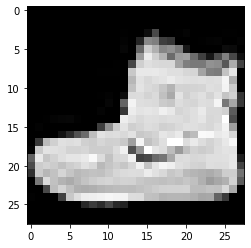

In [48]:
plt.imshow(xtrain[0], cmap = 'gray')
print(f"A classificação é o número: {ytrain[0]}")

A classificação é o número: 2


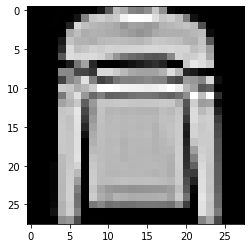

In [49]:
plt.imshow(xtrain[5], cmap = 'gray')
print(f"A classificação é o número: {ytrain[5]}")

No dataset xtrain e xtest ficam os pixels, no ytrain e ytest, o label de identificação de cada uma, por exemplo: shirt, bag, coat... 

Como podemos verificar a seguir:

In [50]:
ytrain 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Para um melhor desempenho do algoritmo, devemos normalizar a imagem, ou seja, transformar todos os pixels entre o tamanho 0 e 1

In [51]:
xtrain = xtrain / 255

In [52]:
xtest = xtest / 255

In [53]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Como possuímos 60.000 imagens com tamanho de 28 x 28, para podermos treinar o algoritmo devemos transformar em vetor, ou seja, (60 , 28 x 28)

In [54]:
xtrain.shape

(60000, 28, 28)

In [55]:
# como a dimensão de cada imagem é 28*28 mudamos toda a base de dados para o formato
#[-1 todos os elementos, altura * largura]
xtrain = xtrain.reshape(-1,28*28)

In [56]:
xtrain.shape

(60000, 784)

In [57]:
xtest = xtest.reshape(-1,28*28)

In [58]:
xtest.shape

(10000, 784)

#**Construindo a rede neural artificial**:


**Partindo do pressuposto do seguinte link:**

https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/#:~:text=O%20n%C3%BAmero%20de%20neur%C3%B4nios%20escondidos%20deve%20ser%202%2F3,o%20dobro%20do%20tamanho%20da%20camada%20de%20entrada.

**Temos:**

1º - O número de neurônios escondidos deve estar entre o tamanho da camada de entrada e o da camada de saída. Usar o número médio entre as duas camadas é uma boa opção; ou seja... Uma camada oculta com 397 neurônios ((784 + 10)  /2) 

2º - O número de neurônios escondidos deve ser 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída. Assim a camada oculta deverá ter 522 neurônios

3º - O número de neurônios escondidos deve ser menor que o dobro do tamanho da camada de entrada. Ou seja, a camada escondida deverá ter menos do que 1568 neurônios

Parâmetros: 
Camada de entrada: 784 neurônios

Camada oculta: 397 ~ 1568 (serão feitos testes com 397,522 e outro com valor de 700)

Utilização do Droupout de 0.2 para zerar o valor de 20% dos neurônios 

Camada de Saída: 10 neurônios pois a quantidade de classes para serem previstas são de 10



Modelo de ativação da camada de saída: 'softmax' pois existem mais de 2 classes para serem definidas

Modelo de ativação das demais camadas: 'relu'


**------------------------Teste 1--------------------------------**

Uma camada oculta com 397 neurônios ((784 + 10)  /2) 

Epoch 12

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Dense(units = 397, activation = "relu", input_shape=(784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax")) #adicionando a camada de saída

Test accuracy: 0.885200023651123

**------------------------Teste 2--------------------------------**

Uma camada oculta com 522 neurônios

Epoch = 12

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,))) 

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax")) 

Test accuracy: 0.8902945968978128


**-------------------------Teste 3 --------------------------------**

Uma camada oculta com 700 neurônios

Epoch = 12

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(units = 700, activation = "relu", input_shape=(784,))) #camada de entrada + camada oculta
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation = "softmax")) 

Test accuracy: 0.8833000063896179


**------------------------Teste 4-----------------------------------**

Duas camadas ocultas de 397 neurônios, 12 epochs

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 397, activation = "relu", input_shape=(784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 397, activation = "relu", input_shape=(784,))) 

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax")) 

Test accuracy: 0.8792999982833862


**---------------------------Teste 5-----------------------------------**

Duas camadas ocultas de 522 neurônios, 12 epochs

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax")) 

Test accuracy: 0.8866999745368958

**---------------------------Teste 6 -----------------------------------**

Duas camadas ocultas de 522 neurônios, 12 epochs

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,))) #camada de entrada + camada oculta

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,))) 

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax"))


Test accuracy: 0.8851000070571899


**-------------------------Teste 7 ----------------------------------**

mesmos parâmetros do teste 2, porém com epoch = 15

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,))) 

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax"))

Test accuracy: 0.8925999999046326


**-------------------------Teste 8 ----------------------------------**

mesmos parâmetros do teste 2, porém com epoch = 10

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,))) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation = "softmax"))

Test accuracy: 0.8841000199317932

**Ou seja, os melhores parâmetros foram do teste 2 e do teste 7**
**Realizei todos os testes com os parâmetros anteriores, então a seguir utilizarei apenas os melhores parâmetros, que são referentes ao teste 7**






"""

In [78]:
#Parametros do teste 7
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 522, activation = "relu", input_shape=(784,)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=10, activation = "softmax"))

In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics =['sparse_categorical_accuracy'])

O sumário a seguir demonstra como se encontra a nossa rede neural atual


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 522)               409770    
_________________________________________________________________
dropout_3 (Dropout)          (None, 522)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5230      
Total params: 415,000
Trainable params: 415,000
Non-trainable params: 0
_________________________________________________________________


Treinamento da nossa rede neural, com os parâmetros passados anteriormente

In [74]:
model.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4995 - sparse_categorical_accuracy: 0.8199
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3844 - sparse_categorical_accuracy: 0.8581
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3508 - sparse_categorical_accuracy: 0.8701
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3308 - sparse_categorical_accuracy: 0.8782
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8849
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3008 - sparse_categorical_accuracy: 0.8878
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2881 - sparse_categorical_accuracy: 0.8933
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - sparse_categorical_accuracy: 0.8947
Epoch 9/15
1875/1875 [==========

In [75]:
test_loss , test_accuracy = model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3250 - sparse_categorical_accuracy: 0.8926


O algoritmo deu uma precisão de 89,25% em todas as 10 mil imagens testadas

In [79]:
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.8925999999046326


In [77]:
test_loss

0.32501065731048584